<a href="https://colab.research.google.com/github/lutherkhill/iris_clustering/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import dependencies
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

number of estimated clusters : 3


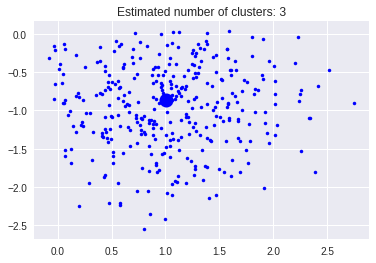

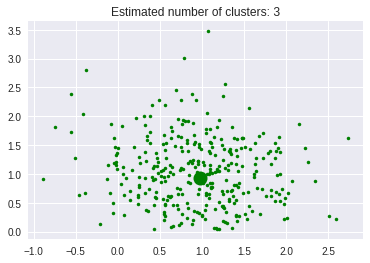

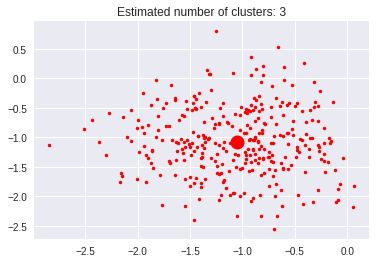

In [18]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
x, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)

# Compute clustering with MeanShift
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(x)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# Plot result
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbrgrcmykbrgrcmyk')
for k, col in zip(range(n_clusters_), colors):
  my_members = labels == k
  cluster_center = cluster_centers[k]
  plt.plot(x[my_members, 0], x[my_members, 1], col + '.')
  plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, 
           markeredgecolor= 'k', markersize=14)
  plt.title("Estimated number of clusters: %d" % n_clusters_)
  plt.show()

In [0]:
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

In [17]:
## Silhouette evaluation
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(x)
labels = kmeans_model.labels_
metrics.silhouette_score(x, labels, metric='euclidean')


0.48835544777536005

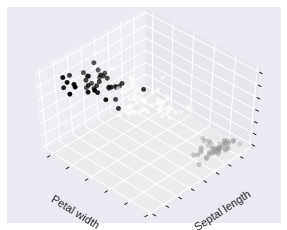

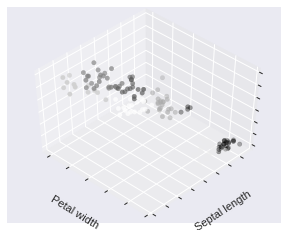

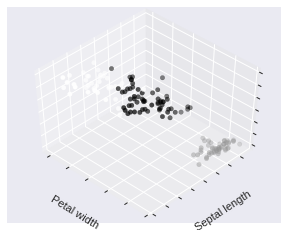

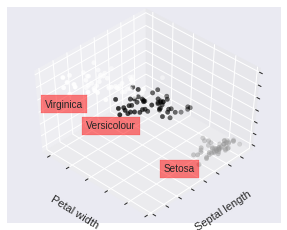

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
x = iris.data
y = iris.target

estimators = {'k_means_iris_3' : KMeans(n_clusters=3),
              'k_means_iris_8' : KMeans(n_clusters=8),
              'k_means_iris_bad_init' : KMeans(n_clusters=3, n_init=1, init='random')}

fignum = 1
for name, est in estimators.items():
  fig = plt.figure(fignum, figsize=(4, 3))
  plt.clf()
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
  
  plt.cla()
  est.fit(x)
  labels = est.labels_
  
  ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=labels.astype(np.float))
  
  ax.w_xaxis.set_ticklabels([])
  ax.w_yaxis.set_ticklabels([])
  ax.w_zaxis.set_ticklabels([])
  ax.set_xlabel('Petal width')
  ax.set_ylabel('Septal length')
  ax.set_zlabel('Petal length')
  fignum = fignum +1
  
 # Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
  ax.text3D(x[y == label, 3].mean(),
            x[y == label, 0].mean() + 1.5,
            x[y == label, 2].mean(), name,
            horizontalalignment = 'center',
            bbox=dict(alpha= .5, edgecolor='r', facecolor='r'))

  # Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(x[:, 3], x[:, 0], x[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Septal length')
ax.set_zlabel('Petal length')
plt.show()